# **Chapter 9**
Replicate at least 2

## **Standard Brownian Motion**
_Note: replaced np.math.sqrt(n) to np.sqrt(n) for optimization_ 

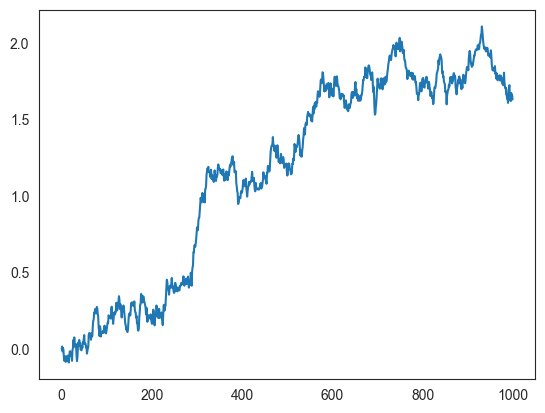

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4)

n = 1000

sqn = 1/(np.sqrt(n))

z_values = np.random.randn(n)

Yk = 0

sb_motion=list()

for k in range(n):
    Yk = Yk + sqn*z_values[k]
    sb_motion.append(Yk)

plt.plot(sb_motion)
plt.show()

## **Amazon Stock Monte Carlo Simulation**

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2012-10-03 to 2022-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2515 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB
None
              Close
Date               
2012-10-03  12.7960
2012-10-04  13.0235
2012-10-05  12.9255
2012-10-08  12.9530
2012-10-09  12.5480
                 Close
Date                  
2022-09-26  115.150002
2022-09-27  114.410004
2022-09-28  118.010002
2022-09-29  114.800003
2022-09-30  113.000000
             Close
count  2515.000000
mean     71.683993
std      53.944668
min      11.030000
25%      19.921750
50%      50.187000
75%     104.449249
max     186.570496


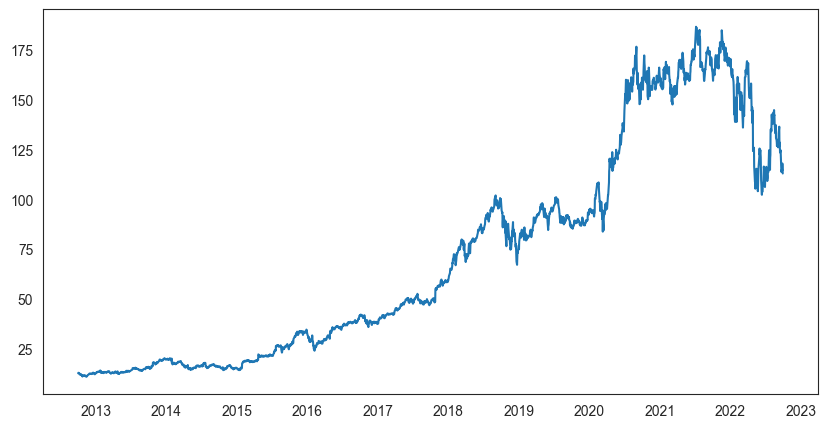

               Close
Date                
2022-09-19  0.009106
2022-09-20 -0.020013
2022-09-21 -0.030327
2022-09-22 -0.010430
2022-09-23 -0.030553
2022-09-26  0.011969
2022-09-27 -0.006447
2022-09-28  0.030981
2022-09-29 -0.027578
2022-09-30 -0.015804


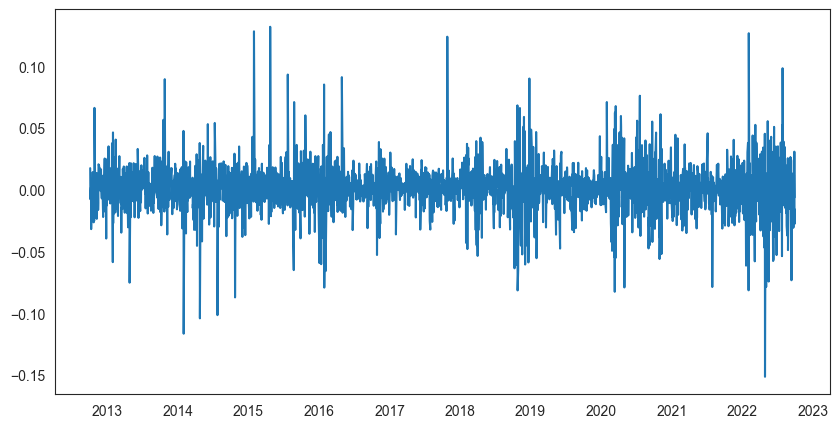

Drift =  [0.0006643]


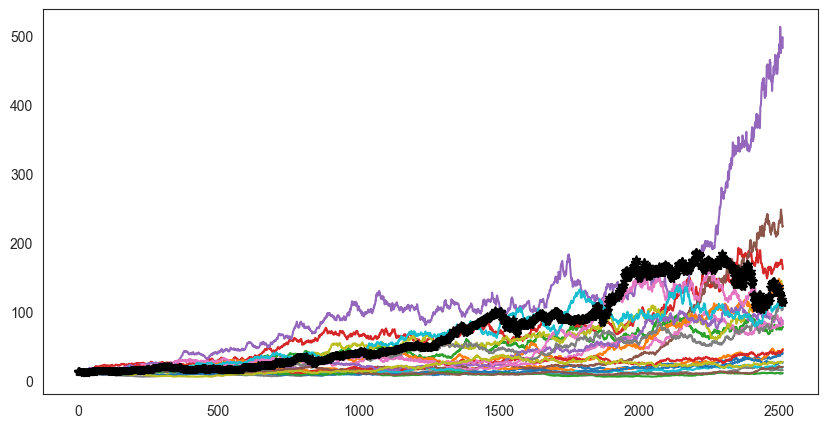

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

AmznData = pd.read_csv('AMZN.csv',header=0, usecols=['Date', 'Close'],parse_dates=True,index_col='Date')
print(AmznData.info())
print(AmznData.head())
print(AmznData.tail())
print(AmznData.describe())

plt.figure(figsize=(10,5))
plt.plot(AmznData)
plt.show()

AmznDataPctChange = AmznData.pct_change()
AmznLogReturns = np.log(1 + AmznDataPctChange) 
print(AmznLogReturns.tail(10))

plt.figure(figsize=(10,5))
plt.plot(AmznLogReturns)
plt.show()

MeanLogReturns = np.array(AmznLogReturns.mean())
VarLogReturns = np.array(AmznLogReturns.var()) 
StdevLogReturns = np.array(AmznLogReturns.std()) 

Drift = MeanLogReturns - (0.5 * VarLogReturns)
print("Drift = ",Drift)

NumIntervals = 2515
Iterations = 20
np.random.seed(7)
SBMotion = norm.ppf(np.random.rand(NumIntervals, Iterations))

DailyReturns = np.exp(Drift + StdevLogReturns * SBMotion)

StartStockPrices = AmznData.iloc[0]
StockPrice = np.zeros_like(DailyReturns)
StockPrice[0] = StartStockPrices
for t in range(1, NumIntervals):

    StockPrice[t] = StockPrice[t - 1] * DailyReturns[t]

plt.figure(figsize=(10,5))
plt.plot(StockPrice)   

AMZNTrend = np.array(AmznData.iloc[:, 0:1])

plt.plot(AMZNTrend,'k*')   
plt.show()